https://www.invertexto.com/fundamentosaula02
https://docs.google.com/presentation/d/1wzwsugIEBU8tP0Gt4gLTb6h6mvnOKuuw/edit#slide=id.g1e1c6646caf_0_142
https://colab.research.google.com/drive/13BVjxKqlWesIis58U7H-BqAPqNo_Sukb#scrollTo=D7znfzJrh4jT

In [1]:
#Bibliotecas
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sn


1️⃣ - Realize a leitura do dataset breast_cancer

In [2]:
cancer = load_breast_cancer()
x_cancer = cancer.data
y_cancer = cancer.target

2️⃣ - Transformando os dados em um DataFrame

In [3]:
x_cancer = pd.DataFrame(x_cancer, columns=cancer['feature_names']) #Transformandos os dados em um dataframe
pd.set_option('display.max_columns', None) #localiza todas as colunas do dataframe
x_cancer['target'] = y_cancer #Incluindo o rotulo (0 para maligno e 1 para benigno). No DataFrame principal

3️⃣ - Visualizando os dados

In [4]:
x_cancer.head() #Lendo as 5 primeiras linhas dos dados

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
x_cancer.sample(5) ##Lendo as 5 linhas aleatorias dos dados

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
290,14.41,19.73,96.03,651.0,0.08757,0.16760,0.13620,0.06602,0.1714,0.07192,0.8811,1.770,4.360,77.11,0.007762,0.106400,0.09960,0.027710,0.04077,0.022860,15.77,22.13,101.70,767.3,0.09983,0.24720,0.2220,0.10210,0.2272,0.08799,1
248,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.493,1.497,16.64,0.007189,0.010350,0.01081,0.006245,0.02158,0.002619,12.25,35.19,77.98,455.7,0.14990,0.13980,0.1125,0.06136,0.3409,0.08147,1
135,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,0.1585,0.06065,0.2367,1.380,1.457,19.87,0.007499,0.012020,0.02332,0.008920,0.01647,0.002629,14.49,33.37,92.04,653.6,0.14190,0.15230,0.2177,0.09331,0.2829,0.08067,0
129,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.11490,0.2202,0.06113,0.4953,1.199,2.765,63.33,0.005033,0.031790,0.04755,0.010430,0.01578,0.003224,22.63,33.58,148.70,1589.0,0.12750,0.38610,0.5673,0.17320,0.3305,0.08465,0
473,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,0.05960,0.4455,3.647,2.884,35.13,0.007339,0.008243,0.00000,0.000000,0.03141,0.003136,13.45,38.05,85.08,558.9,0.09422,0.05213,0.0000,0.00000,0.2409,0.06743,1


In [6]:
x_cancer.tail() #Lendo as 5 ultimas linhas dos dados

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [7]:
x_cancer.columns #Lendo o nome das colunas dos dados

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Resumo das colunas
1-mean radius = raio médio do tumor (média das distâncias do centro para pontos na periferia).
2-mean texture = variação na intensidade dos pixels (granularidade da imagem).
3-mean perimeter = perímetro do tumor.
4-mean area = área do tumor.
5-mean smoothness = regularidade das bordas (variação local nos comprimentos dos raios).
6-mean compactness = relação entre perímetro e área (perimeter ** 2 / area - 1.0
7-mean concavity = gravidade das concavidades na superfície do tumor.
8-mean concave points = número de pontos côncavos nas bordas.
9-mean symmetry = simetria do tumor.
10-mean fractal dimension = complexidade da borda (métrica de auto-semelhança).

4️⃣ - Tamanho de linhas e colunas

In [8]:
x_cancer.shape #Tamamnho das linhas e colunas

(569, 31)

5️⃣ - Resumo Estatístico

In [9]:
x_cancer.describe() #Resumo estatistico dos dados

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


6️⃣ - Informações dos dados

In [10]:
x_cancer.info() #Verificando informacoes dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

7️⃣ - Verificando se há dados nulos

In [11]:
x_cancer.isnull().sum() #Verificando dados nulos

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

8️⃣ – Distribuição das Classes:

In [12]:
#-Conte quantas amostras são malignas (0) e benignas (1).
agrupando_target = x_cancer.groupby(['target']).size()
agrupando_target.index = ['Benigno (1)', 'Maligno (0)']
agrupando_target

Benigno (1)    212
Maligno (0)    357
dtype: int64

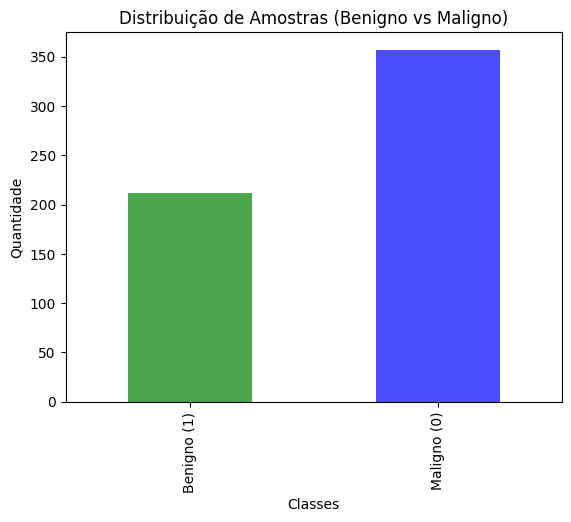

In [13]:
#-Visualize essa distribuição com um gráfico de barras.
agrupando_target.plot(kind='bar', color=['green', 'blue'], alpha=0.7)
plt.title('Distribuição de Amostras (Benigno vs Maligno)')
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.grid(True, linestyle='', alpha=0.7)
plt.show()

9️⃣ – Análise de Correlação:


-Gere um heatmap para identificar quais variáveis estão mais correlacionadas.

In [14]:
#-Calcule a correlação entre as colunas.
correlacao = x_cancer.corr()
correlacao.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560


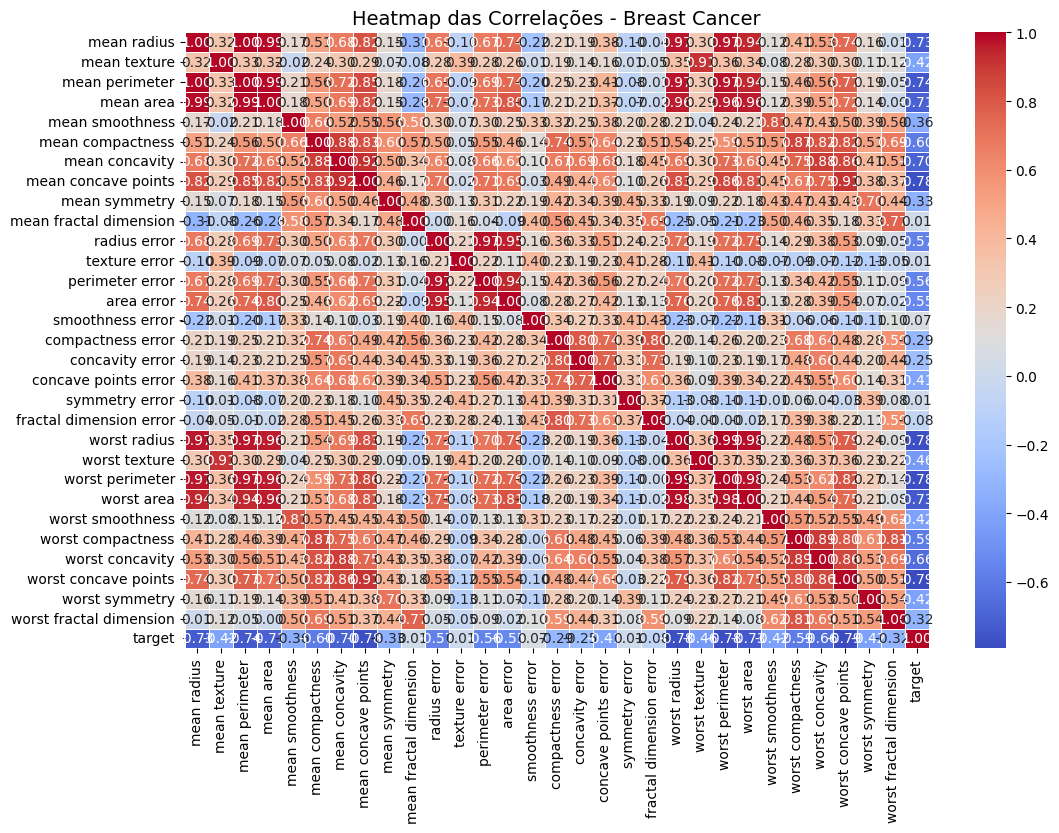

In [15]:
#-Gere um heatmap para identificar quais variáveis estão mais correlacionadas.
plt.figure(figsize=(12, 8))
plot = sn.heatmap(
    correlacao, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    linewidths=0.5, 
    cbar=True
)
plt.title('Heatmap das Correlações - Breast Cancer', fontsize=14)
plt.show()

In [16]:
# Correlação específica com target
correlacao_target = correlacao[['target']].sort_values(by='target', ascending=False)
correlacao_target


,target
target,1.000000
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522
fractal dimension error,-0.077972
concavity error,-0.253730
compactness error,-0.292999
worst fractal dimension,-0.323872
mean symmetry,-0.330499


🔟 – Visualização de Dispersão:

-Escolha duas variáveis importantes e faça um gráfico de dispersão (scatter plot).
-Diferencie os pontos entre maligno e benigno com cores.

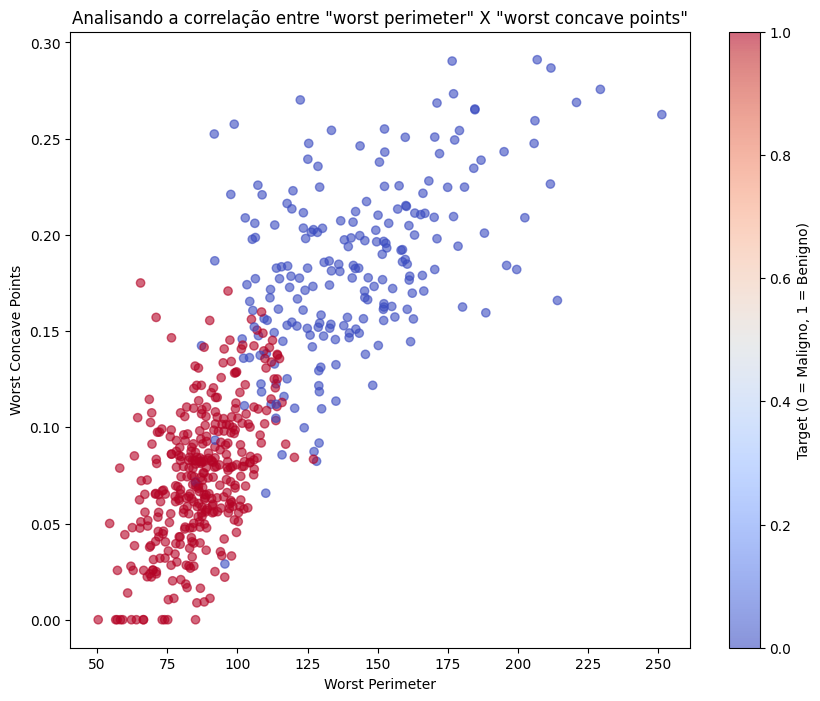

In [17]:
x = x_cancer["worst perimeter"]  
y = x_cancer["worst concave points"]  

plt.figure(figsize=(10, 8), dpi=100)  # Define o tamanho e resolução do gráfico
plt.scatter(x, y, c=x_cancer["target"], cmap="coolwarm", alpha=0.6)  # Usa cores para diferenciar os grupos
plt.colorbar(label="Target (0 = Maligno, 1 = Benigno)")  # Adiciona legenda da cor

plt.title('Analisando a correlação entre "worst perimeter" X "worst concave points"')  
plt.xlabel('Worst Perimeter')  
plt.ylabel('Worst Concave Points')  

plt.show()


1️⃣ - Machine learning

🟨 Passo 1: Normalizar os dados (opcional, mas recomendado)

In [18]:
#Separando amostras de 70% para treino e 30% para teste#
x_treino, x_teste, y_treino, y_teste = train_test_split(cancer.data, cancer.target, test_size=0.3, stratify=cancer.target)

In [19]:
#Normalizar os dados
#Biblioteca
from sklearn.preprocessing import MinMaxScaler

#Criar e ajustar o scaler
scaler = MinMaxScaler()

x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)
x_treino[:5]  # Para ver as 5 primeiras amostras normalizadas

array([[5.19144304e-01, 4.27385892e-01, 4.86559326e-01, 3.55673383e-01,
        2.61710670e-01, 1.46739464e-01, 1.70876289e-01, 2.78131213e-01,
        5.13614522e-01, 2.19731927e-04, 1.58123686e-01, 1.88693423e-01,
        1.22508599e-01, 8.82296908e-02, 1.06906601e-01, 4.63394118e-02,
        1.79264476e-01, 2.41149144e-01, 5.94613610e-01, 4.58543514e-02,
        4.50017787e-01, 4.21375267e-01, 3.92400020e-01, 2.64402281e-01,
        2.37931718e-01, 1.02030507e-01, 2.39586662e-01, 4.29970972e-01,
        7.88073177e-01, 6.48781531e-02],
       [2.32807989e-01, 2.04979253e-01, 2.37163983e-01, 1.22714740e-01,
        6.41075557e-01, 3.38077419e-01, 8.69259606e-02, 1.49254473e-01,
        4.42071543e-01, 6.18545375e-01, 1.02153266e-01, 6.48868458e-02,
        1.06676719e-01, 3.40457006e-02, 3.91219873e-01, 3.39156427e-01,
        2.18231612e-01, 2.71393643e-01, 3.29093263e-01, 3.88259611e-01,
        1.85699039e-01, 1.19669510e-01, 1.78544748e-01, 7.97286669e-02,
        4.70382355e-01,

🟧 Passo 2: Treinar o modelo (começaremos simples)

In [20]:
#Arvore de decisao
#Biblioteca
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(x_treino, y_treino)

In [27]:
#Ajustando a Arvore de decisao
clf = tree.DecisionTreeClassifier(
    class_weight='balanced',      # Dá peso maior para a classe menor
    max_depth=5,                  # Limita a profundidade (pode ajustar)
    min_samples_split=5,          # Controla a divisão dos nós
    criterion='gini',             # Critério de impureza (ou 'entropy')
    random_state=42
)

clf = clf.fit(x_treino, y_treino)


In [28]:
#predicoes
y_pred = clf.predict(x_teste)

In [ ]:
#Acuracidade
#Biblioteca
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_teste, y_pred)
print(f'{accuracy * 100:.2f}')

Acuracia: 93.57


In [ ]:
#Matriz de confusao
#Biblioteca
from sklearn.metrics import classification_report, confusion_matrix

con = np.array(confusion_matrix(y_teste, y_pred, labels=[1,0]))
conf_matrix =pd.DataFrame(con, index=['Esta com cancer', 'Esta saudavel'], columns=['Previu que estava com CA', 'Previu que estava saudavel'])
conf_matrix

,Preveu que estav com CA,Previu que esta saudavel
Esta com cancer,105,2
Esta saudavel,4,60


In [ ]:
#Precision
#Biblioteca
from sklearn.metrics import precision_score

precision = precision_score(y_teste, y_pred, average='weighted') 
print(f'{precision * 100:.2f}')

Precisao: 93.68


In [ ]:
#Recall
#Biblioteca
from sklearn.metrics import recall_score

recall = recall_score(y_teste, y_pred, average='weighted')
print(f'{recall * 100:.2f}')

Recall: 93.57


In [ ]:
#F1-score
#Biblioteca
from sklearn.metrics import f1_score

f1 = f1_score(y_teste, y_pred, average='weighted')
print(f'{f1 * 100:.2f}')

F1_score: 93.60


In [21]:
#KNN
#Biblioteca
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=3)

In [39]:
#predicoes
y_pred_knn = knn.predict(x_teste)

In [ ]:
#Acuracidade
#Biblioteca
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_teste, y_pred_knn)
print(f'{accuracy_knn * 100:.2f}')

Acuracia_knn: 96.49


In [48]:
#Matriz de confusao
#Biblioteca
from sklearn.metrics import classification_report, confusion_matrix

con = np.array(confusion_matrix(y_teste, y_pred_knn, labels=[1,0]))
conf_matrix_knn =pd.DataFrame(con, index=['Esta com cancer', 'Esta saudavel'], columns=['Previu que estava com CA', 'Previu que estava saudavel'])
conf_matrix_knn

,Previu que estava com CA,Previu que estava saudavel
Esta com cancer,105,2
Esta saudavel,4,60


In [ ]:
#Precision
#Biblioteca
from sklearn.metrics import precision_score

precision_knn = precision_score(y_teste, y_pred_knn, average='weighted') 
print(f'{precision_knn * 100:.2f}')

Precisao_knn: 96.50


In [ ]:
#Recall
#Biblioteca
from sklearn.metrics import recall_score

recall_knn = recall_score(y_teste, y_pred_knn, average='weighted')
print(f'{recall_knn * 100:.2f}')

Recall_knn: 96.49


In [ ]:
#F1-score
#Biblioteca
from sklearn.metrics import f1_score

f1_knn = f1_score(y_teste, y_pred_knn, average='weighted')
print(f'{f1_knn * 100:.2f}')

F1_score: 96.48


In [65]:
#Resultados dos algoritmos (Arvore de Decisao e KNN)
dfs = [accuracy, accuracy_knn, precision, precision_knn, f1, f1_knn]
dfs

[0.935672514619883,
 0.9649122807017544,
 0.9368306913475806,
 0.964964200972986,
 0.9359517844815239,
 0.9647962498839692]

In [22]:
#Regressao Logistica
#Biblioteca
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)
logreg.fit(x_treino, y_treino)

LogisticRegression(random_state=16)

🟥 Passo 3: Fazer previsões e avaliar o modelo

3-Usando os dados amostrais, use os algoritmos Gaussian Naive Bayes, SVM, Decision tree e Random Forest para fazer a classificação ( em duas classes: maligno e benigno).


4-Calcule a performance do algoritmo naive bayes (acertos/total) e indique qual obteve o melhor resultado.